In [1]:
import pandas as pd
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# %matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
# opening dataset
airbnb = pd.read_csv('../data/AB_NYC_2019.csv', sep=',', decimal='.')

### Examining of data structure and features

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# amount of null values per column
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# finding duplicated values
airbnb.duplicated().sum()

0

In [7]:
# removing sensitive (eg. name, document) or non relevant data
airbnb.drop(['id','name','host_name','last_review'], axis=1, inplace=True)
print(airbnb.columns)

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [8]:
# replacing null valeus of "reviews_per_month" by zero
airbnb['reviews_per_month'].fillna(0, inplace=True)

# checking
airbnb.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Categorical data
### - Host info

In [9]:
# max listing by the same host
airbnb['calculated_host_listings_count'].max()

327

In [10]:
print('number of unique host: ', len(airbnb['host_id'].unique()))
airbnb['host_id'].value_counts()

number of unique host:  37457


219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
1641589        1
4070519        1
208106618      1
235939247      1
1288080        1
Name: host_id, Length: 37457, dtype: int64

### - Neighbourhood info

In [11]:
# number of neighbourhood groups in ascending order of quantity
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [12]:
# number of different neighbourhood
len(airbnb['neighbourhood'].unique())

221

### - Room type info

In [13]:
# number of room types in ascending order of quantity
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

## Numerical data

In [14]:
airbnb[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
        'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Searching for wrong data:
- max price of 10000 dolars one night?
- min price of 0 dolars?
- max nights of 1.250 days?
- min zero days available in the year?

Later we will need to work in these problems

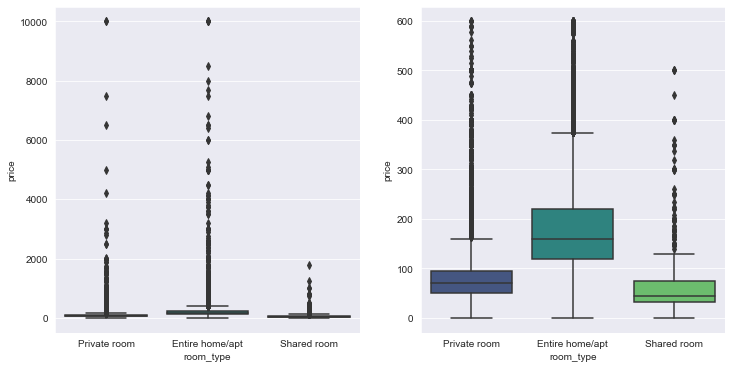

In [15]:
# Price by room type
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,6))

sns.boxplot(data=airbnb, x='room_type', y='price', palette='viridis', ax=ax1)
sns.boxplot(data=airbnb.loc[airbnb['price'] < 600], x='room_type', y='price', palette='viridis', ax=ax2)

#TODO: clean outliers - remove or replace?

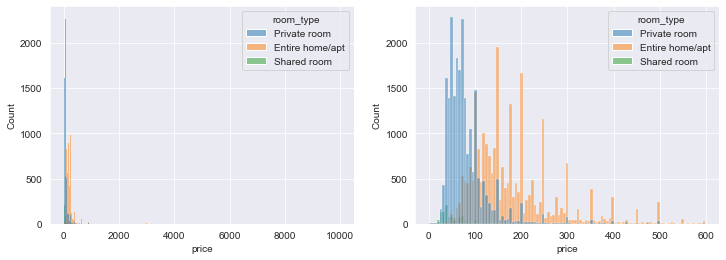

In [18]:
# Price distribution
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,4))

sns.histplot(airbnb, x='price', hue='room_type', ax=ax1)
sns.histplot(airbnb.loc[airbnb['price'] < 600], x='price', hue='room_type', ax=ax2);

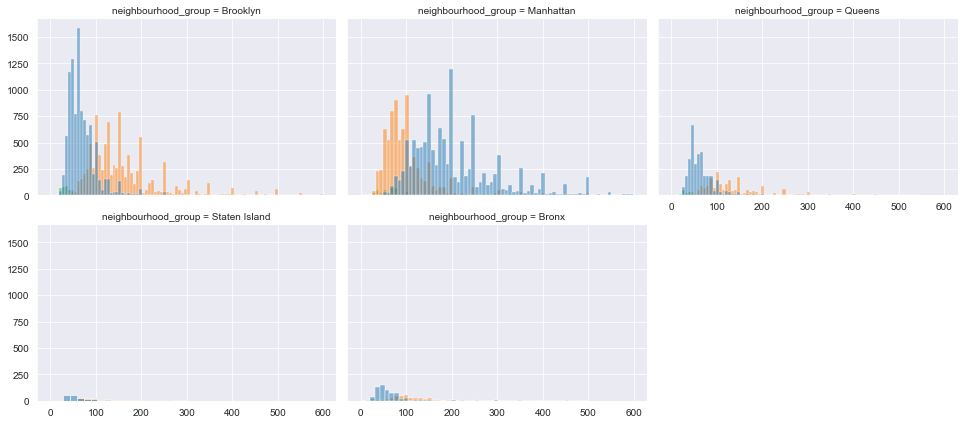

In [17]:
# Price x Neighbourhood Group
g = sns.FacetGrid(airbnb.loc[airbnb['price'] < 600], col='neighbourhood_group', col_wrap=3, height=3, aspect=1.5)
g.map_dataframe(sns.histplot, x='price', hue='room_type');

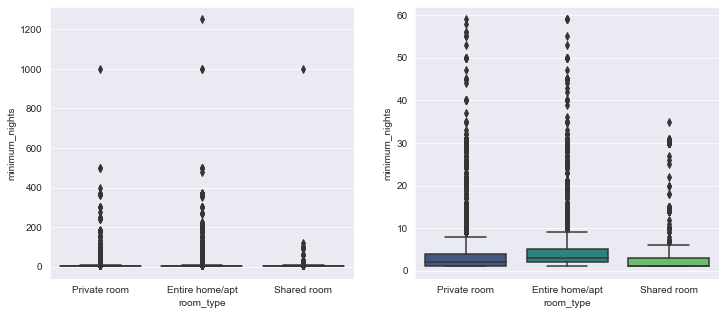

In [19]:
# Minimum nights by room type
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(data=airbnb, x='room_type', y='minimum_nights', palette='viridis', ax=ax1)
sns.boxplot(data=airbnb.loc[airbnb['minimum_nights'] < 60], x='room_type', y='minimum_nights', palette='viridis', ax=ax2);

#TODO: clean outliers - remove or replace?

___
## Data Cleaning
There are many ways to remove outliers and here we will choose these approach to enhance the dataset quality

### price
- Isolation Forest - from scikit-learn - to identify outliers

### minimum nights
- remove values > 60 days

### availability_365
- remove values == 0 days

#### * First: identify the amount of data to be removed, whether or not they are representative of the data set

___
## Price

In [20]:
from sklearn.ensemble import IsolationForest

In [21]:
# isolate price column
airbnb[['price']].head()

,price
0,149
1,225
2,150
3,89
4,80


### Isolation Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

Unsupervised learning algorithm, based on the Decision Tree algorithm, that identifies anomaly by isolating outliers in the data.

Return the anomaly score of each sample using the IsolationForest algorithm

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.


In [22]:
# Model settings:
# n_estimators: number of base estimators in the ensemble - number of trees built in the forest 
# max_samples: all values will be used for all trees (no sampling)
# contamination: the proportion of outliers in the data set, defines the threshold on the anomaly_scores
# in our dataset: ~2% values too hight or too low
model = IsolationForest(n_estimators=100, max_samples=50000, contamination=0.02)
model.fit(airbnb[['price']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.02,
                max_features=1.0, max_samples=50000, n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [23]:
# output of anomaly detection:
# price_scores - anomaly score each value.
airbnb['price_scores'] = model.decision_function(airbnb[['price']])

# price_anomaly - pediction of each value, if it is an outlier or not. +1: not outlier; -1: outlier
airbnb['price_anomaly'] = model.predict(airbnb[['price']])

In [29]:
# checking high values
airbnb.loc[airbnb['price'] > 9000]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_scores,price_anomaly
6530,1235070,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0,-0.310528,-1
9151,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,-0.310528,-1
12342,3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83,-0.310528,-1
17692,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0,-0.310528,-1
29238,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83,-0.310528,-1
40433,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.00,1,365,-0.310528,-1


In [32]:
# checking low values
airbnb.loc[airbnb['price'] < 10]

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_scores,price_anomaly
23161,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,0.05,4,28,-0.150151,-1
25433,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2.56,4,127,-0.150151,-1
25634,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,0.71,5,0,-0.150151,-1
25753,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,0.53,2,0,-0.150151,-1
25778,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,0.15,1,73,-0.150151,-1
25794,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,4.28,6,176,-0.150151,-1
25795,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,4.37,6,232,-0.150151,-1
25796,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,4.35,6,222,-0.150151,-1
26259,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,0.00,1,0,-0.150151,-1
26841,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,0.11,6,333,-0.150151,-1


In [35]:
# amount of price outliers
complete = len(airbnb)
anomaly_p = len(airbnb.loc[airbnb['price_anomaly'] == -1])
print('anomaly detection of price values: ', round((anomaly_p/complete)*100,2), '%')

anomaly detection of price values:  1.99 %


In [36]:
# In this case, it was chosen to remove the outlier values, with the possibility of also removing false positives
# identified by the Isolation Forest. There could be other ways of working with this data.
airbnb_clean = airbnb.loc[airbnb['price_anomaly'] == 1]

# removing new columns (anomaly detection)
airbnb_clean.drop(['price_scores','price_anomaly'], axis=1, inplace=True)
airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47923 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         47923 non-null  int64  
 1   neighbourhood_group             47923 non-null  object 
 2   neighbourhood                   47923 non-null  object 
 3   latitude                        47923 non-null  float64
 4   longitude                       47923 non-null  float64
 5   room_type                       47923 non-null  object 
 6   price                           47923 non-null  int64  
 7   minimum_nights                  47923 non-null  int64  
 8   number_of_reviews               47923 non-null  int64  
 9   reviews_per_month               47923 non-null  float64
 10  calculated_host_listings_count  47923 non-null  int64  
 11  availability_365                47923 non-null  int64  
dtypes: float64(3), int64(6), object(

___
## minimum_nights

In [37]:
# amount of minimum_nights outliers - values > 60 days
complete = len(airbnb_clean)
anomaly_n = len(airbnb_clean.loc[(airbnb_clean['minimum_nights'] > 60)])
print('anomaly detection of minimum nights values: ', round((anomaly_n/complete)*100,2), '%')

anomaly detection of minimum nights values:  0.64 %


In [38]:
# In this case, it was chosen to remove the outlier values. There could be other ways of working with this data.
airbnb_clean = airbnb_clean.loc[airbnb_clean['minimum_nights'] <= 60]
airbnb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47614 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         47614 non-null  int64  
 1   neighbourhood_group             47614 non-null  object 
 2   neighbourhood                   47614 non-null  object 
 3   latitude                        47614 non-null  float64
 4   longitude                       47614 non-null  float64
 5   room_type                       47614 non-null  object 
 6   price                           47614 non-null  int64  
 7   minimum_nights                  47614 non-null  int64  
 8   number_of_reviews               47614 non-null  int64  
 9   reviews_per_month               47614 non-null  float64
 10  calculated_host_listings_count  47614 non-null  int64  
 11  availability_365                47614 non-null  int64  
dtypes: float64(3), int64(6), object(

___
## availability_365

In [39]:
# amount of availability_365 outliers - values = 0 days
complete = len(airbnb_clean)
anomaly_a = len(airbnb_clean.loc[(airbnb['availability_365'] == 0)])
print(anomaly_a)
print('anomaly detection of minimum nights values: ', round((anomaly_a/complete)*100,2), '%')

17278
anomaly detection of minimum nights values:  36.29 %


#### Why so many data with 0 days available?
- hypothesis: Those places were already rented on the date the dataset was generated? Users have suspended the ad on the platform?
- Because the amount of data is representative in this case, and may not represent an outlier, we will not remove them

___

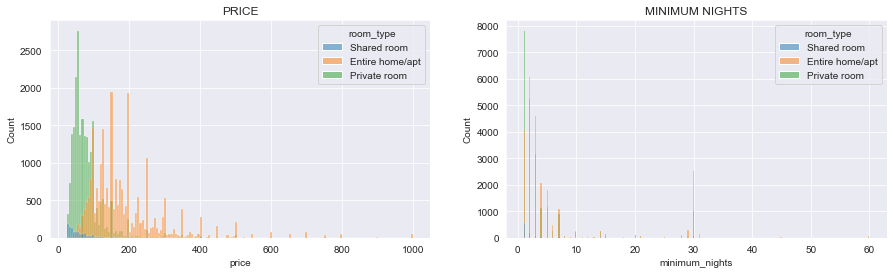

In [42]:
# New distribution after Data Cleaning
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15,4))

sns.histplot(airbnb_clean, x='price', hue='room_type', hue_order=['Shared room', 'Entire home/apt', 'Private room'],
             ax=ax1).set_title('PRICE')
sns.histplot(airbnb_clean, x='minimum_nights', hue='room_type', hue_order=['Shared room', 'Entire home/apt', 'Private room'],
             ax=ax2).set_title('MINIMUM NIGHTS');

## Prediction